#**Forecasting the Future: An Analysis of College Park Area Weather Data**
Collaborators: Amia Yi, Kevin Fan, Vincent Zhao

#**Introduction**

**Overview and Purpose**

This tutorial is intended to demonstrate the entire data science pipeline, including data collection, data processing, exploratory data analysis (EDA), hypothesis testing and machine learning modeling, and finally insight and policy decision making based on model interpretation. To this end, our tutorial will walk you through an example analysis of local weather data from Maryland and the College Park area. We will be utilizing support vector machines (SVMs) along with univariate and multivariate linear regression, not only in order to determine possible trends in weather data, but also determine the extent to which climate change (operationalized by the factors contributing to climate change) has on local weather.

This type of weather analysis is crucial to understanding climate patterns and future extreme weather events. Weather plays a significant impact on the day to day lives of people, dictating what daily activities they are allowed to do, impacting their commutes and travel time, and finally having the final say on the possibility of outdoor events. Local data analysis, the likes presented here, can impact people attending and working for the University of Maryland, the City of College Park, and the wider Prince George's County. As climate change presents an ever-growing impact on global weather, we aim to analyze local historical weather data to predict future weather trends to not only corroborate the existance of climate change, but also help elucidate the climate change trend to provide some forewarning to University and County leaders of possible weather shifts. This information is crucial to ensuring that they are aware of the danger posed by extreme weather to bolster disaster prepardness, improve public health and safety guidelines, promote redundant energy production, and finally guide future urban planning and infrastruture that is weather-resilient.


**The Significance of Climate Change**

While many believe climate change to be fake, insignificant, or a globalized issue that will not affect people's immediate lives, scientists have decidedly proven over and over again that this is false. The fact of the matter is that [climate change is real](https://www.epa.gov/climatechange-science/impacts-climate-change), and according to a study done by Pew Research, has a significant effect on communities at the local level. The study can be found [here](https://www.pewresearch.org/science/2021/05/26/local-impact-of-climate-change-environmental-problems/). As such, the existence of temperature changes, more severe weather, changes in rainfall, and rising sea levels can all have an impact on the College Park community, such as with deadly storms, strains on the power grid and infrastructure, and the local environment. This tutorial will also demonstrate how we can use linear regression to analyze the patterns in the factors affecting climate change, namely greenhouse gas emissions, increasing human population (and thus activity), and deforestation and how that may relate to local temperature data here in College Park.

Learn more about the impact of climate change [here](https://www.noaa.gov/education/resource-collections/climate/climate-change-impacts).


**Tutorial Specifics**

In this tutorial, for our weather data, we will utilize NOAA's yearly summary data for the College Park and Beltsville stations spanning from 1895 to the present. NOAA, or the [National Oceanic and Atmospheric Administration](https://www.noaa.gov/about-our-agency), is a governmental agency charged with forcasting and moitoring weather and atmospheric and marine conditions. As such, they are a reliable source of credible information. The dataset includes a wide variety of data, but we will focus on precipitation and average and extreme temperatures. For our data on climate change factors, we will utilize a variety of sources from governmental bodies, research institutions, and nonprofits. For our population data, we will utilize population data for PG county from 2001 to 2021 from the [Federal Reserve Bank of St. Louis](https://research.stlouisfed.org/), one of the regional branches that makes up the United States' Federal Reserve System; the bank collects research and population data. For our local greenhouse gas emissions, we will use data provided from the [Environmental Protection Agency](https://cfpub.epa.gov/ghgdata/inventoryexplorer/#allsectors/allsectors/allgas/gas/all) that has a Greenhouse Gas Inventory Data Explorer to suit our needs. For our global greenhouse gas emissions, we will use data from the [Global Carbon Project](https://www.globalcarbonproject.org/carbonbudget/22/data.htm), a nonprofit of scientists dedicated to quantifying greenhouse gas emissions. Finally, for tree coverage and deforestation, we will use data provided by the [Global Forest Watch](https://www.globalforestwatch.org/), a nonprofit dedicated to quantifying deforestation, which works with the University of Maryland's [Global Land Analysis and Discovery](https://glad.umd.edu/projects/global-forest-watch) project which uses satellite data to keep track of the world's forest cover. Following data collection and scraping, we will the perform some exploratory data analysis to visualize our current data and identify posible trends/correlations. These will guide hypothesis formulation for our machine learning algorithm which will help to predict future weather patterns based on historical data. Finally, we wil analyze our results to identify climate patterns and formulate a deeper understanding of climate dynamics.


# Data Collection

Before we continue with this tutorial, we must import some important data science python libraries such as NumPy, Pandas, statsmodels, and SciKitLearn.


In [55]:
# imports
import math
import numpy as np
import pandas as pd
import statsmodels.api
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

**Getting Data**

To get our weather data that we will use for analysis, we requested the specific yearly summary data we needed from the database of the National Oceanic and Atmospheric Administration (NOAA) at their website https://www.ncei.noaa.gov/data/gsoy/.

After requesting, a CSV file containing all of their collected information for a specific station, in this case the College Park and Beltsville stations, was sent to us via email. The data, which stretches back to 1895, contains a multitude of yearly information, the specifics of which can be found [here](https://www.ncei.noaa.gov/pub/data/metadata/documents/GSOYReadme.txt).

The climate change data, explained in the introduction, has been directly downloaded from the sites mentioned above and contains yearly data that we will further explore and process in the next section.

We also read the CSV files obtained from the [Federal Reserve Bank of St. Louis](https://research.stlouisfed.org/), [Environmental Protection Agency](https://cfpub.epa.gov/ghgdata/inventoryexplorer/#allsectors/allsectors/allgas/gas/all), [Global Carbon Project](https://www.globalcarbonproject.org/carbonbudget/22/data.htm), [Global Forest Watch](https://www.globalforestwatch.org/), and the University of Maryland's [Global Land Analysis and Discovery](https://glad.umd.edu/projects/global-forest-watch) project for our multivariate regression later.

Using Jupyter Notebook which runs on Python, we can easily read in this CSV using Pandas and output it into a dataframe.

In [21]:
# NOTE: CSV stored in /content/3680211.csv
df = pd.read_csv("C:/Users/aegir/Documents/dATASCI/CMSC320/Final Project/content/3680211.csv")
df.sort_values("DATE", inplace=True)
dfMDGas = pd.read_csv("C:/Users/aegir/Documents/dATASCI/CMSC320/Final Project/Data/greenhouseGas.csv")
dfTotGas = pd.read_csv("C:/Users/aegir/Documents/dATASCI/CMSC320/Final Project/Data/globalGreenhouseGas.csv")
dfTrees = pd.read_csv("C:/Users/aegir/Documents/dATASCI/CMSC320/Final Project/Data/PGCountyTreeLoss.csv")
dfTotTrees = pd.read_csv("C:/Users/aegir/Documents/dATASCI/CMSC320/Final Project/Data/treecover_loss_by_region__ha.csv")
dfPop = pd.read_csv("C:/Users/aegir/Documents/dATASCI/CMSC320/Final Project/Data/MDPRIN5POP.csv")

# Data Processing


**Climate Data Cleanup**

The CSV file obtained from NOAA contains many columns that we do not need for the purposes of our analysis - we can reduce the side of the dataframe to only the columns of data that are useful to us and make it easier to view while reducing the amount of information we need to store and update when modifying it.

In [22]:
df = df[["NAME", "DATE", "TAVG", "TMAX", "TMIN", "PRCP"]]

**Climate Data Organizing**

In order to adequetely partition the data, we split the data by what station it originated from. We then merge the necessary data into a cleaned dataframe for future use.

In [23]:
# College Park station data
CP = df.loc[df["NAME"] == "COLLEGE PARK, MD US"]

#Beltsville station data
BV = df.loc[df["NAME"] == "BELTSVILLE, MD US"]

# Beltsville plant station data
BV_PS = df.loc[df["NAME"] == "BELTSVILLE PLANT STATION, MD US"]

# Merge Beltsville station data with pre-1948 College Park data for the main frame
clean_set = pd.concat([CP.loc[CP["DATE"] < 1948], BV])

**Linear Separation Testing with SVMs**

(outlining)

before we use imputation to fill in gaps we want to make sure the beltsville, college park data is similar enough to each other to where imputation won't be a major issue - we use SVMs to try dividing the college park and beltsville data, but unlike the usual goal of SVMs (separating data into distinct groups) we want it to fail at finding a proper split - that way we know the data is relatively similar overall

for the data our svm is trying to split, we will use the overlapping data between the college park and beltsville stations, dropping all nans

In [24]:
# get dataframe with all overlapping years between college park, beltsville

# with the knowledge that beltsville data records later years than college park data:
# add all college park data with date greater than or equal to
# first recorded beltsville year (not counting nans)
svm_df = CP.dropna().loc[CP["DATE"] >= BV.dropna()["DATE"].iloc[0]]

# add all beltsville data with date less than or equal to
# first recorded college park year (not counting nans)
svm_df = pd.concat([svm_df, BV.dropna().loc[BV["DATE"] <= CP.dropna()["DATE"].iloc[-1]]])
svm_df.sort_values("DATE")

,NAME,DATE,TAVG,TMAX,TMIN,PRCP
99,"BELTSVILLE, MD US",1949,12.9,19.1,6.7,983.6
100,"BELTSVILLE, MD US",1950,11.6,17.7,5.5,1199.3
51,"COLLEGE PARK, MD US",1950,12.9,19.1,6.6,1187.8
52,"COLLEGE PARK, MD US",1951,13.3,19.9,6.8,1088.2
101,"BELTSVILLE, MD US",1951,12.0,18.6,5.4,1056.3
...,...,...,...,...,...,...
90,"COLLEGE PARK, MD US",1989,12.9,18.1,7.8,1226.7
139,"BELTSVILLE, MD US",1989,12.2,17.8,6.5,1282.6
140,"BELTSVILLE, MD US",1990,13.7,20.2,7.3,1125.8
92,"COLLEGE PARK, MD US",1991,15.0,20.8,9.2,1044.9


Now that we have our data, we can run the SVM function.

In [62]:
# make svm classifier

clf = svm.SVC(kernel="linear")
features = svm_df.drop(["NAME", "DATE"], axis = 1)
labels = svm_df[["NAME"]]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=30)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.625


c:\Users\aegir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Climate Data Imputation**

It is important to recognize that the College Park NOAA data is incomplete. To cover holes in the data, we use [*imputation*](http://www.stat.columbia.edu/~gelman/arm/missing.pdf), the process of replacing missing data with substituted values. Since the Beltsville station data is more complete than the College Park station data, we elected to use that as our main data source instead, and importing data from other nearby stations instead, including College Park. This is an application of *cold deck imputation*, where missing data is substituted with data from a similar dataset. While Cold-Deck imputation is generally not recognized to be a precise and accurate method, Beltsville is only 4 miles from College Park and as such, the climate data will be relatively similar, thus avoiding the issues of cold-deck imputation by providing valid and reliable data. Thus, we use the Beltsville station data as our base, and use the average of every other station recording to fill in missing data from the years 1895 to 2024. It also became necessary to sort the data in chronological order.

In [26]:
# Cold-deck impute College Park data for missing years
years = list(clean_set["DATE"])
missing = []
for i, e in enumerate(years[:-1]):
    if (n := years[i+1]) - e > 1:
        missing.append(list(range(e+1, n)))
pd.concat([clean_set, df.loc[df["DATE"].isin([1994, 1995])]], join = "outer")
clean_set.sort_values("DATE")

,NAME,DATE,TAVG,TMAX,TMIN,PRCP
0,"COLLEGE PARK, MD US",1895,NaN,NaN,NaN,877.3
1,"COLLEGE PARK, MD US",1896,NaN,NaN,NaN,NaN
2,"COLLEGE PARK, MD US",1898,13.8,19.3,8.3,NaN
3,"COLLEGE PARK, MD US",1900,13.1,19.3,6.9,NaN
4,"COLLEGE PARK, MD US",1901,NaN,NaN,NaN,1239.3
...,...,...,...,...,...,...
168,"BELTSVILLE, MD US",2020,14.1,19.3,8.9,1459.0
169,"BELTSVILLE, MD US",2021,14.1,19.5,8.6,1077.7
170,"BELTSVILLE, MD US",2022,13.3,18.9,7.6,1161.5
171,"BELTSVILLE, MD US",2023,14.1,19.9,8.4,967.3


In [27]:
# Creates a frame copied from the clean frame with missing data cold deck imputed from the original frame.
# Takes the mean of all overlapping years to substitute for NaN values where applicable.
def col_cd(col):
    new_frame = clean_set[["DATE", col]]
    missing = new_frame.loc[np.isnan(new_frame[col])]
    for date in missing["DATE"]:
            (new_frame.loc[new_frame["DATE"] == date, col]) = ((df.loc[df["DATE"]==date])[col]).mean()
    return new_frame

**Cleaning Up Data for Climate Change Factors**

In the previous section, we read in 5 CSVs into dataframes. Now in this section, we will clean up the data so that we have yearly data for the time frame from 2001 to 2021 to perform our regression on climate change factors and weather.

**Local Greenhouse Gas Emissions**

As mentioned previously, this data was provided by the EPA and includes breakdowns on multiple different types of gases emitted (in million metric tons) from 1990 to 2022 in the state of Maryland. Maryland was used as we could not find local data on just PG County, so this is another version of Cold Deck imputation. For this section, we only want the net gas emitted. We also note that the data uses the years as the columns and the type of gas as the rows. For this data processing, we will drop the unnecessary rows, leaving only the net total. We will then transpose the dataframe so that the years are used as rows. We rename the columns, drop the years outside of our range, and assign the indices to be the years to prepare for merging.

In [28]:
#Drop unnecessary data for specific gas types
dfMDGas.drop([0, 1, 2, 3, 4, 6], inplace = True)

#Transpose to get years as rows
dfMDGas = dfMDGas.T

#Drop the column label rows
dfMDGas.drop(["Maryland Emissions by Gas, MMT CO2 eq."], inplace = True)

#Reset index to get year into its own column instead of being just the index
dfMDGas.reset_index(inplace = True)

#Rename columns to better fit the data
dfMDGas.rename(columns={5:"MD Million Metric Tons (CO2)", "index":"year"}, inplace = True)

#Drop years for which we cannot run comparisons and reset index
dfMDGas.drop(dfMDGas.index[0:11], inplace = True)
dfMDGas.reset_index(drop = True, inplace = True)

#Correctly change the type of data to ensure smooth merging later
dfMDGas['year'] = dfMDGas['year'].astype('int64')
dfMDGas['MD Million Metric Tons (CO2)'] = dfMDGas['MD Million Metric Tons (CO2)'].astype('float64')

#Set the index as the year
dfMDGas.set_index('year', inplace = True)
print(dfMDGas)

      MD Million Metric Tons (CO2)
year                              
2001                     83.292629
2002                     84.192573
2003                     86.863551
2004                     88.102244
2005                     89.062022
2006                     81.948631
2007                     82.428045
2008                     77.503976
2009                     73.822841
2010                     74.176838
2011                     74.022623
2012                     65.730140
2013                     65.227936
2014                     68.406016
2015                     66.307272
2016                     64.465904
2017                     58.521143
2018                     65.436799
2019                     60.710371
2020                     51.949163
2021                     56.917564


**Global Greenhouse Gas Emissions**

This data was provided by the Global Carbon Project and includes global greenhouse gas emissions, reported as billion metric tons from 1940 to 2023. For this data processing, we will drop the unnecessary rows, leaving only the years we are interested in. We will then rename the columns, adjust the units, and assign the indices to be the years to prepare for merging.

In [29]:
#Drop the years that are unnecessary for analysis
dfTotGas.drop(dfTotGas.index[0:60], inplace = True)

#Rename columns
dfTotGas.rename(columns={"1940":"year", "4.86":"Global Million Metric Tons (CO2)"}, inplace = True)

#Adjust scaling to reflect Million Metric Tons instead of Billion Metric Tons
dfTotGas["Global Million Metric Tons (CO2)"] = dfTotGas["Global Million Metric Tons (CO2)"]*1000

#Reset index
dfTotGas.reset_index(drop = True, inplace = True)

#FYI: Can check the type of data with the following
#print(dfTotGas.dtypes)

#Set the year as index
dfTotGas.set_index('year', inplace = True)
print(dfTotGas)

      Global Million Metric Tons (CO2)
year                                  
2001                           25670.0
2002                           26250.0
2003                           27650.0
2004                           28620.0
2005                           29590.0
2006                           30610.0
2007                           31500.0
2008                           32040.0
2009                           31490.0
2010                           33310.0
2011                           34440.0
2012                           34940.0
2013                           35230.0
2014                           35470.0
2015                           35460.0
2016                           35460.0
2017                           36030.0
2018                           36770.0
2019                           37040.0
2020                           35010.0
2021                           36820.0
2022                           37150.0
2023                           37550.0


**Local Tree Cover Loss**

This data was provided by the Global Forest Watch and includes forest loss in PG county, reported as hectacres from 2001 to 2023. For this data processing, we will drop the unnecessary columns containing metadata, leaving only the deforestation values we are interested in. We will then rename the columns and assign the indices to be the years to prepare for merging.

In [30]:
#Drop columns containing metadata
dfTrees.drop(['iso', 'adm1', 'adm2', 'gfw_gross_emissions_co2e_all_gases__Mg'], axis = 1, inplace = True)

#Rename the columns
dfTrees.rename(columns={"umd_tree_cover_loss__year":"year", "umd_tree_cover_loss__ha":"PG Tree Cover Lost (HA)"}, inplace = True)

#Set the year as the index
dfTrees.set_index('year', inplace = True)
print(dfTrees)

      PG Tree Cover Lost (HA)
year                         
2001               244.650864
2002               293.966294
2003               218.448959
2004               269.323615
2005               633.179814
2006               426.670451
2007               382.803406
2008               239.581051
2009               213.451877
2010                71.910980
2011                91.129189
2012               165.772841
2013               150.576156
2014               144.730723
2015               121.320630
2016               124.228509
2017               214.562761
2018                96.377797
2019               201.795022
2020               186.738985
2021               236.410011
2022               211.662392
2023                94.273548


**Global Tree Cover Loss**

This data was provided by the Global Forest Watch and includes forest loss for each county, reported as hectacres, from 2001 to 2023. For this data processing, we will drop the unnecessary columns containing metadata, leaving only the deforestation values we are interested in. We will then sum the values for each year across all countries to obtain the global data. Finally, we will rename the columns and assign the indices to be the years to prepare for merging.

In [31]:
#Drop metadata column
dfTotTrees.drop(['gfw_gross_emissions_co2e_all_gases__Mg'], axis = 1, inplace = True)

#Rename columns to be of use
dfTotTrees.rename(columns={"umd_tree_cover_loss__year":"year", "umd_tree_cover_loss__ha":"Global Tree Cover Lost (HA)"}, inplace = True)

#Group data by year and sum across all countries to get the total for the world
dfTotTrees = dfTotTrees.groupby('year')['Global Tree Cover Lost (HA)'].sum()

#Convert the Series returned above into a dataframe and rename along the way
dfTotTrees = pd.DataFrame({'year':dfTotTrees.index, 'Global Tree Cover Lost (HA)':dfTotTrees.values})

#Convert the year into the index
dfTotTrees.set_index('year', inplace = True)
print(dfTotTrees)

      Global Tree Cover Lost (HA)
year                             
2001                 1.335465e+07
2002                 1.645274e+07
2003                 1.447536e+07
2004                 1.990872e+07
2005                 1.809829e+07
2006                 1.764974e+07
2007                 1.838796e+07
2008                 1.861115e+07
2009                 1.699171e+07
2010                 1.855336e+07
2011                 1.757922e+07
2012                 2.353232e+07
2013                 2.064326e+07
2014                 2.373271e+07
2015                 1.962233e+07
2016                 2.967479e+07
2017                 2.937803e+07
2018                 2.474983e+07
2019                 2.417422e+07
2020                 2.580434e+07
2021                 2.527387e+07
2022                 2.281900e+07
2023                 2.825607e+07


**PG County Population Data**

This data was provided by the US Federal Reserve System for research and includes population count as deduced from the US census, reported in thousands, from 1970 to 2023. For this data processing, we will convert the dates provided (always the first day of the year) into just the year. We will then rename the columns and assign the indices to be the years to prepare for merging.

In [32]:
#Rename columns
dfPop.rename(columns={"population":"PG Population"}, inplace = True)

#Drop unnecessary years
dfPop.drop(dfPop.index[0:31], inplace = True)

#Convert the date into just the year
dfPop['DATE'] = pd.to_datetime(dfPop['DATE']).dt.year

#Adjust the scale
dfPop["MDPRIN5POP"] = dfPop["MDPRIN5POP"]*1000

#Rename the columns
dfPop.rename(columns={"DATE":"year", "MDPRIN5POP":"PG Population"}, inplace = True)

#Set the index to be the year
dfPop.set_index('year', inplace = True)
print(dfPop)

      PG Population
year               
2001       814548.0
2002       823554.0
2003       829606.0
2004       834877.0
2005       839000.0
2006       835066.0
2007       830801.0
2008       828734.0
2009       832213.0
2010       866442.0
2011       874594.0
2012       882787.0
2013       891020.0
2014       900372.0
2015       906754.0
2016       909262.0
2017       910946.0
2018       911372.0
2019       911562.0
2020       965365.0
2021       956451.0
2022       946980.0
2023       947430.0


**Temperature Data**

This data will simply be the TAVG from the NOAA dataset, processed above, from 2001 to 2023. For this data processing, we will use cold deck imputation to get College Park data from the specified years. We will then use linear imputation to determine any missing values. Finally, we will rename the columns and assign the indices to be the years to prepare for merging.

In [33]:
#Making a copy of temperature data, for this comparison, we will only be using mean monthly temperatures
dfTemp = col_cd("TAVG")

#Get data for specified timeframe
dfTemp = dfTemp[dfTemp['DATE'].between(2001, 2023)]

#Interpolate missing data
dfTemp = dfTemp.interpolate()

#Rename the columns
dfTemp.rename(columns={"DATE":"year"}, inplace = True)

#Set the index to be the year
dfTemp.set_index('year', inplace = True)
print(dfTemp)

      TAVG
year      
2001  13.1
2002  13.6
2003  12.3
2004  13.0
2005  13.1
2006  13.9
2007  13.5
2008  13.1
2009  12.8
2010  13.6
2011  14.0
2012  14.4
2013  13.3
2014  12.2
2015  13.3
2016  13.8
2017  14.0
2018  13.5
2019  13.9
2020  14.1
2021  14.1
2022  13.3
2023  14.1


**Climate Data Merging**

In this step, we will merge the data provided above into one dataframe for easy access. We will accomplish this using the concat method. Since all of our dataframes use the same years as their indicies, we can easily merge the dataframes. In the same line, we can reset the index to turn the year into its own column for easier analysis down the line. Finally, we drop some years that turn out to be outside of our range and we are left with our finished dataset that is ready for the next step!

In [34]:
dfClimateFactors = pd.concat([dfTemp,dfPop,dfTrees,dfTotTrees,dfMDGas,dfTotGas],axis=1,sort=False).reset_index()
#Drop rows were we have incomplete data
dfClimateFactors = dfClimateFactors.drop(dfClimateFactors.index[21:23]).copy()
print(dfClimateFactors)

    year  TAVG  PG Population  PG Tree Cover Lost (HA)  \
0   2001  13.1       814548.0               244.650864   
1   2002  13.6       823554.0               293.966294   
2   2003  12.3       829606.0               218.448959   
3   2004  13.0       834877.0               269.323615   
4   2005  13.1       839000.0               633.179814   
5   2006  13.9       835066.0               426.670451   
6   2007  13.5       830801.0               382.803406   
7   2008  13.1       828734.0               239.581051   
8   2009  12.8       832213.0               213.451877   
9   2010  13.6       866442.0                71.910980   
10  2011  14.0       874594.0                91.129189   
11  2012  14.4       882787.0               165.772841   
12  2013  13.3       891020.0               150.576156   
13  2014  12.2       900372.0               144.730723   
14  2015  13.3       906754.0               121.320630   
15  2016  13.8       909262.0               124.228509   
16  2017  14.0

# Exploratory Data Analysis and Data Visualization


**Visualizing Data**

Here, we take the raw data and visualize it by plotting it into scatterplots and line graphs. This data will be useful for extracting patterns in further analysis, and can give an initial intuitive understanding of the data as a whole.

On first glance, intuitive analysis suggests that, while varied, temperatures do seem to increase with time.

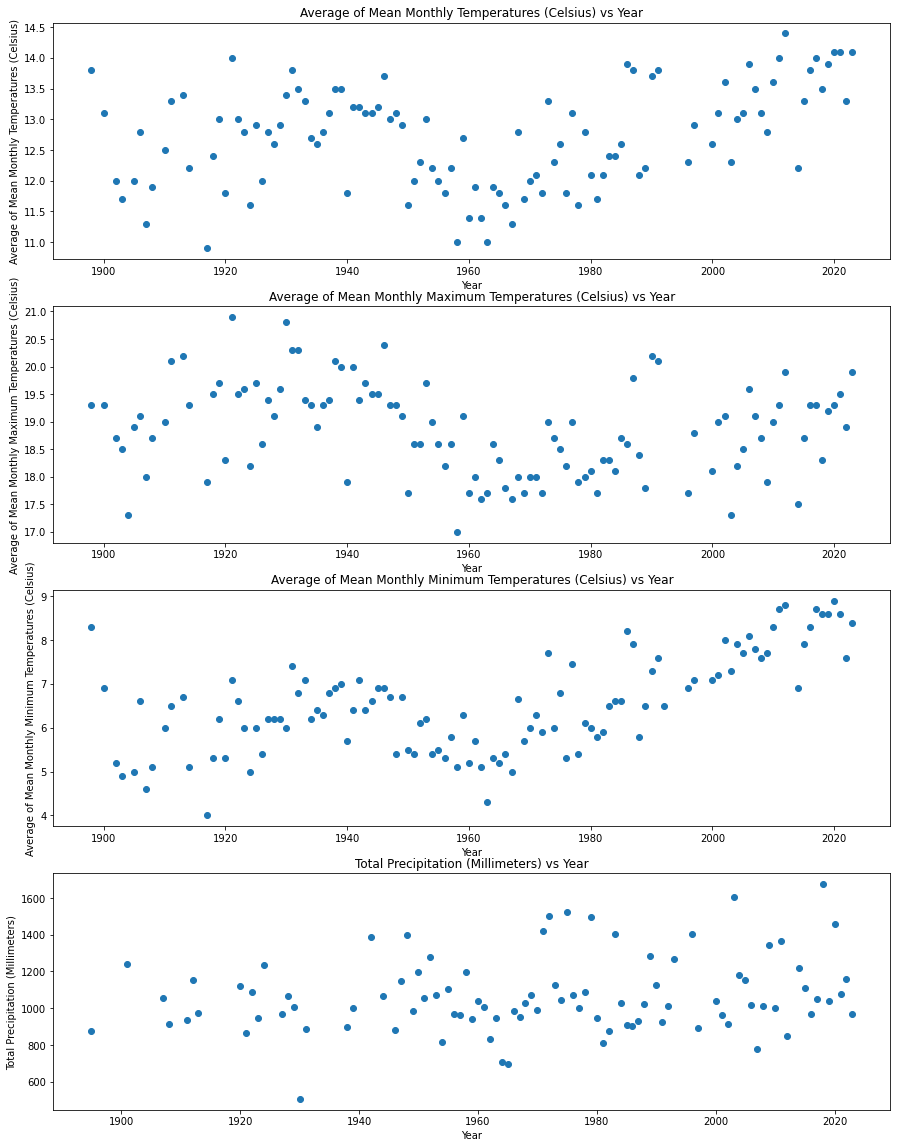

In [35]:
# Plot temperature data with imputations

fig, axs = plt.subplots(4, sharex=False, sharey=False)
fig.set_figheight(20)
fig.set_figwidth(15)

# Graph the TAVG temperature per year, which is the average of
# monthly average temperatures of the year
TAVG = col_cd("TAVG")
axs[0].scatter(TAVG["DATE"], TAVG["TAVG"])
axs[0].set_title("Average of Mean Monthly Temperatures (Celsius) vs Year")
axs[0].set_ylabel("Average of Mean Monthly Temperatures (Celsius)")
axs[0].set_xlabel("Year")

# Graph the TMAX temperature per year, which is the average of
# mean monthly maximum temperatures of the year
TMAX = col_cd("TMAX")
axs[1].scatter(TMAX["DATE"], TMAX["TMAX"])
axs[1].set_title("Average of Mean Monthly Maximum Temperatures (Celsius) vs Year")
axs[1].set_ylabel("Average of Mean Monthly Maximum Temperatures (Celsius)")
axs[1].set_xlabel("Year")

# Graph the TMIN temperature per year, which is the average of
# mean monthly minimum temperatures of the year
TMIN = col_cd("TMIN")
axs[2].scatter(TMIN["DATE"], TMIN["TMIN"])
axs[2].set_title("Average of Mean Monthly Minimum Temperatures (Celsius) vs Year")
axs[2].set_ylabel("Average of Mean Monthly Minimum Temperatures (Celsius)")
axs[2].set_xlabel("Year")

# Graph PRCP, the total precipitation per year
PRCP = col_cd("PRCP")
axs[3].scatter(PRCP["DATE"], PRCP["PRCP"])
axs[3].set_title("Total Precipitation (Millimeters) vs Year")
axs[3].set_ylabel("Total Precipitation (Millimeters)")
axs[3].set_xlabel("Year")

plt.show()

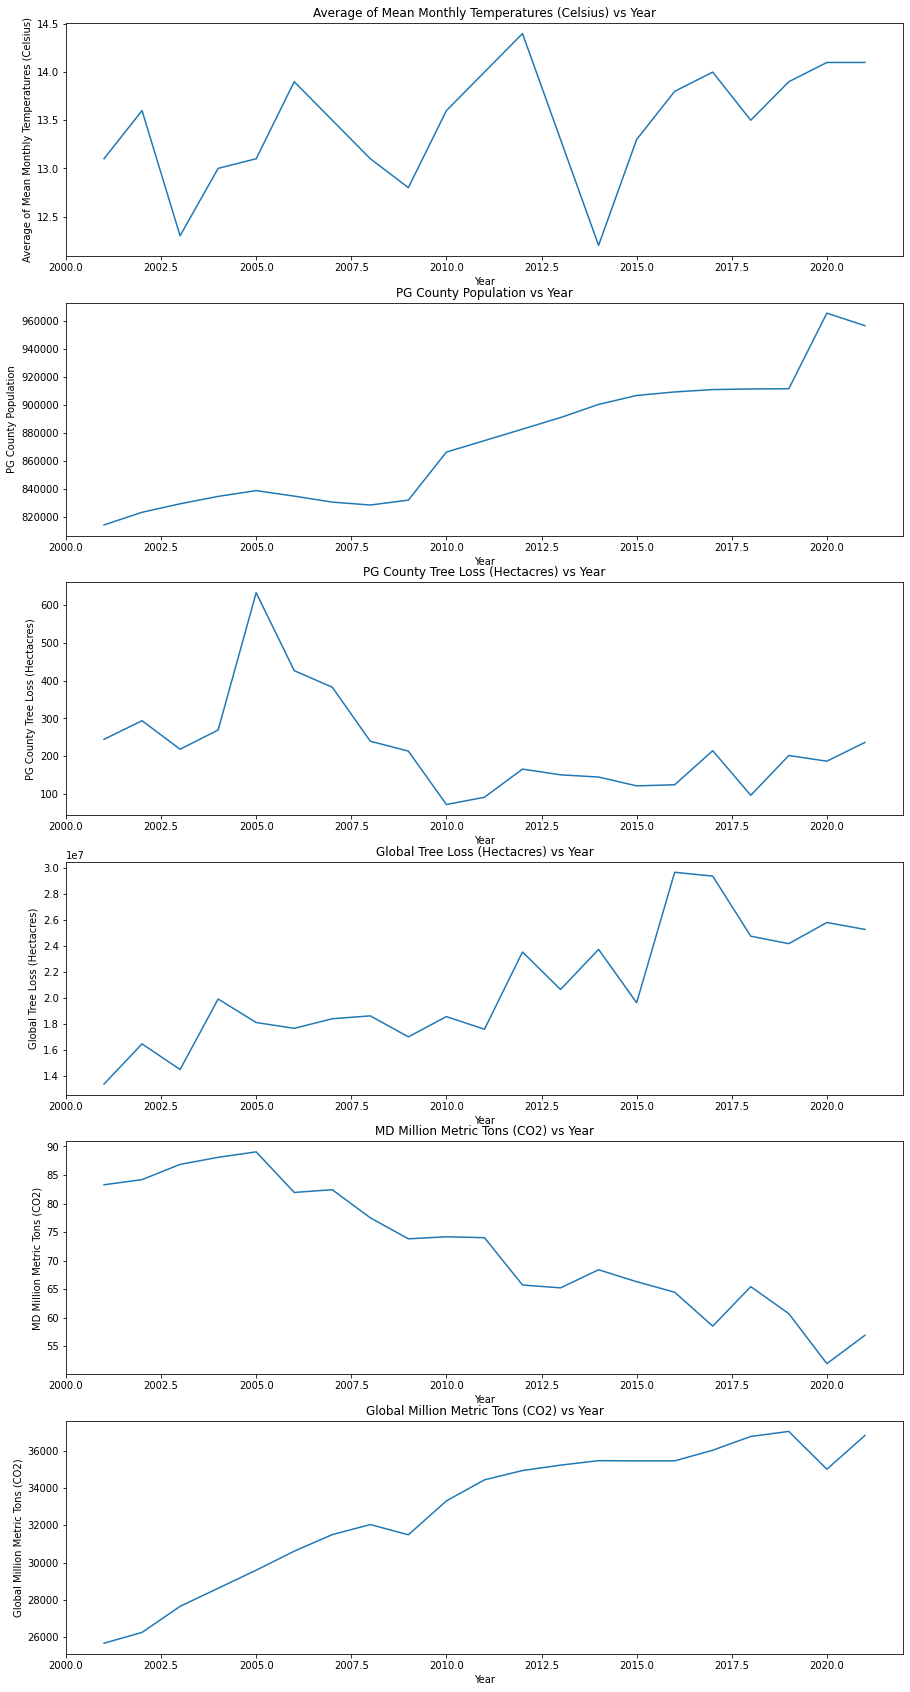

In [36]:
#Plot the climate change factors

fig, axs2 = plt.subplots(6, sharex=False, sharey=False)
fig.set_figheight(30)
fig.set_figwidth(15)

# Graph the TAVG temperature per year, which is the average of
# monthly average temperatures of the year
axs2[0].plot(dfClimateFactors["year"], dfClimateFactors["TAVG"])
axs2[0].set_title("Average of Mean Monthly Temperatures (Celsius) vs Year")
axs2[0].set_ylabel("Average of Mean Monthly Temperatures (Celsius)")
axs2[0].set_xlabel("Year")

# Graph the population
axs2[1].plot(dfClimateFactors["year"], dfClimateFactors["PG Population"])
axs2[1].set_title("PG County Population vs Year")
axs2[1].set_ylabel("PG County Population")
axs2[1].set_xlabel("Year")

# Graph the tree loss in PG County
axs2[2].plot(dfClimateFactors["year"], dfClimateFactors["PG Tree Cover Lost (HA)"])
axs2[2].set_title("PG County Tree Loss (Hectacres) vs Year")
axs2[2].set_ylabel("PG County Tree Loss (Hectacres)")
axs2[2].set_xlabel("Year")

# Graph the global tree loss
axs2[3].plot(dfClimateFactors["year"], dfClimateFactors["Global Tree Cover Lost (HA)"])
axs2[3].set_title("Global Tree Loss (Hectacres) vs Year")
axs2[3].set_ylabel("Global Tree Loss (Hectacres)")
axs2[3].set_xlabel("Year")

# Graph MD Greenhouse Gases
axs2[4].plot(dfClimateFactors["year"], dfClimateFactors["MD Million Metric Tons (CO2)"])
axs2[4].set_title("MD Million Metric Tons (CO2) vs Year")
axs2[4].set_ylabel("MD Million Metric Tons (CO2)")
axs2[4].set_xlabel("Year")

# Graph Total Greenhouse Gases
axs2[5].plot(dfClimateFactors["year"], dfClimateFactors["Global Million Metric Tons (CO2)"])
axs2[5].set_title("Global Million Metric Tons (CO2) vs Year")
axs2[5].set_ylabel("Global Million Metric Tons (CO2)")
axs2[5].set_xlabel("Year")

plt.show()

# Analysis, Hypothesis Testing, and Machine Learning

**Overview**

At this point in the tutorial, we now have a clean, easy to read dataset of weather data, and another dataset for climate change factors and the temperature. We have explored the relationships and patterns between variables such as how the temperature and precipitation change over time; we have also visualized how climate change factors have changed over time. Now, for this phase of the tutorial, we will use the insights gained from exploratory data analysis in order to guide our hypothesis and model for our machine learning algorithm.

**Hypothesis**

Recall from the introduction that we are interested in weather analysis to help predict trends and patterns in weather data to help forcast future weather shifts to better help local officials plan against changing weather. In addition, we seek to corroborate the concept of global warming and visualize its impact on the local scale.

Thus, we can hypothesize that there will be a relationship between the average monthly temperatures, mean high and low temperatures, and more inclement weather, operationalized as precipitation, as time goes on due to climate change factors such as population growth (human activity), deforestation, and greenhouse gas emissions.

Thus, our machine learning model will seek to elucidate the relationship between temperature, extreme temperatures, and precipitation, and time, as well as the extent of the relationship/impact between climate change factors and local temperatures.

Our null hypothesis assumes that there will be no relationship between the variables, in this case the year and the various average temperatures and precipitation; and no relationship between climate change factors and temperature.

**Time Regression Analysis**

In order to determine whether our hypothesis is true, we conduct some [hypothesis testing](https://www.britannica.com/science/statistics/Hypothesis-testing). In this tutorial, we will build a linear regression mode from statsmodels. Statsmodels is a python library that provides simple and easy to use linear regression tools which we will demonstrate here in order to showcase the linear regression between variables such as temperature and precipitation over time.

Statsmodels can also return the p value for each linear regression model to determine the significance of each model. A low p-value, below our critical value of 0.05, will indicate significance as it indicates a low probability of the null hypothesis being true.  

In [37]:
# linear regression model for TAVG vs year
regTAVG = sm.ols(formula="TAVG ~ DATE", data=TAVG, missing="drop").fit()
# linear regression model for TMAX vs year
regTMAX = sm.ols(formula="TMAX ~ DATE", data=TMAX, missing="drop").fit()
# linear regression model for TMIN vs year
regTMIN = sm.ols(formula="TMIN ~ DATE", data=TMIN, missing="drop").fit()
# linear regression model for PRCP vs year
regPRCP = sm.ols(formula="PRCP ~ DATE", data=PRCP, missing="drop").fit()
print("coefficient p-value for TAVG vs year: " + str(regTAVG.pvalues[1]))
print("coefficient p-value for TMAX vs year: " + str(regTMAX.pvalues[1]))
print("coefficient p-value for TMIN vs year: " + str(regTMIN.pvalues[1]))
print("coefficient p-value for PRCP vs year: " + str(regPRCP.pvalues[1]))

coefficient p-value for TAVG vs year: 0.001567019888202221
coefficient p-value for TMAX vs year: 0.02639478431235396
coefficient p-value for TMIN vs year: 1.88549524672765e-12
coefficient p-value for PRCP vs year: 0.04140295274864603


C:\Users\aegir\AppData\Local\Temp/ipykernel_5276/761147758.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("coefficient p-value for TAVG vs year: " + str(regTAVG.pvalues[1]))
C:\Users\aegir\AppData\Local\Temp/ipykernel_5276/761147758.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("coefficient p-value for TMAX vs year: " + str(regTMAX.pvalues[1]))
C:\Users\aegir\AppData\Local\Temp/ipykernel_5276/761147758.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

We found that all of the p values for our models are below 0.05. Thus, we can reject our null hypothesis and accept our alternative hypothesis that the variables we tested, including average temperature and precipiation, do vary with the year.

To get a feel for how effective our models are relative to each other, we also check their F-statistics.

In [38]:
# print the f-statistics
print("f-statistic for TAVG vs year: " + str(regTAVG.fvalue))
print("f-statistic for TMAX vs year: " + str(regTMAX.fvalue))
print("f-statistic for TMIN vs year: " + str(regTMIN.fvalue))
print("f-statistic for PRCP vs year: " + str(regPRCP.fvalue))

f-statistic for TAVG vs year: 10.516066177179566
f-statistic for TMAX vs year: 5.064271486726974
f-statistic for TMIN vs year: 62.87127285648476
f-statistic for PRCP vs year: 4.278533369918377


The regression models for TMAX and PRCP have lower F-statistics along with higher p-values relative to the other models, so there's a higher chance those models do not reject the null hypothesis.


Below, we will take a closer look at the slopes of our linear regression models. This will help to quantify the relationship between the year and its impact on the temperature in College Park.

In [39]:
# print out slope coefficients for each model
print("Average Monthly Temperature increases " + str(regTAVG.params[1]) + " degrees Celsius an year, on average")
print("Mean Highest Monthly Temperature increases " + str(regTMAX.params[1]) + " degrees Celsius an year, on average")
print("Mean Lowest Monthly Temperature increases " + str(regTMIN.params[1]) + " degrees Celsius an year, on average")
print("Yearly Precipitation increases " + str(regPRCP.params[1]) + " milimeters an year, on average")

Average Monthly Temperature increases 0.006876145113471118 degrees Celsius an year, on average
Mean Highest Monthly Temperature increases -0.0049281124009026255 degrees Celsius an year, on average
Mean Lowest Monthly Temperature increases 0.01899643206298126 degrees Celsius an year, on average
Yearly Precipitation increases 1.3009824844527813 milimeters an year, on average


C:\Users\aegir\AppData\Local\Temp/ipykernel_5276/751841383.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Average Monthly Temperature increases " + str(regTAVG.params[1]) + " degrees Celsius an year, on average")
C:\Users\aegir\AppData\Local\Temp/ipykernel_5276/751841383.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Mean Highest Monthly Temperature increases " + str(regTMAX.params[1]) + " degrees Celsius an year, on average")
C:\Users\aegir\AppData\Local\Temp/ipykernel_5276/751841383.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer

At this point, we see that our average monthly temperature increases by a value of ~0.00688 degrees Celsius. This suggests that for every increase in one year, the average monthly temperatures for that year will increase by 0.00688 degrees. The low p-value determined from the previous section demonstrates that this increase is significant.

For our mean highest monthly temperature, we see a decrease in 0.00493 degrees Celsius per year, suggesting that as the years increase, our highest monthly temperatures decrease by 0.00493. The low p-value determined from the previous section demonstrates that this increase is significant.

For our mean lowest monthly temperature, we see an increase in 0.01900 degrees Celsius per year. The low p-value determined from the previous section demonstrates that this increase is significant.

Finally, for our yearly precipitation, we we an increase in 1.3010 mL per year. The low p-value determined from the previous section demonstrates that this increase is significant.

We note that all of these coefficients are positive and thus there is a positive correlation between the year and these variables. In other words, the year is an explanatory variable whose increase correlates with the increase in the metric (temperature or precipitation).

We graph the regression lines for easy visualization of the relationships between our data and the year.

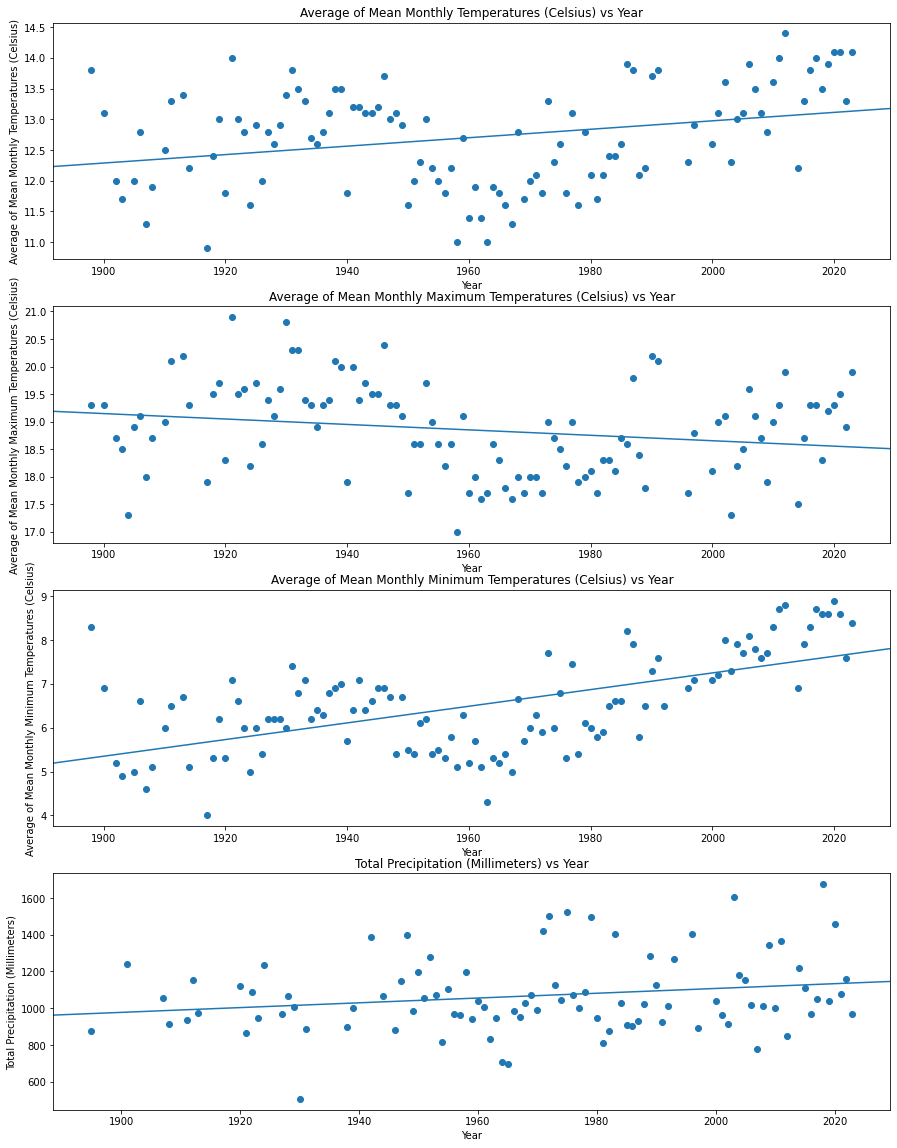

In [40]:
# graph the regression lines from statsmodels
abline_plot(model_results = regTAVG, ax = axs[0])
abline_plot(model_results = regTMAX, ax = axs[1])
abline_plot(model_results = regTMIN, ax = axs[2])
abline_plot(model_results = regPRCP, ax = axs[3])

**Analysis**

It is clear from the graphs that our mean monthly temperature, mean monthly minimum temperature, and yearly precipitation increases as the years increase, although the exact pattern of said increase is difficult to determine with the previous analysis alone. Furthermore, the low p-value determined from the previous section demonstrates that this increase is significant. This data does support our overall claim that there is an increase in temperatures and inclement weather events (due to the increase in precipitation). While the slope values calulated were relatively low, amounting to decimals of degrees, there is still a correlation present and an indication of a general increase. We can extrapolate this trend into the future to suggest that there will be more increases in temperature.

Notably, the mean monthly maximum temperatures have decreased and was the only regression model to suggest a decrease. From this data, we can extrapolate that while average temperatures are rising, the high temperatures are decreasing, suggesting some sort of convergence at a higher average temperature and smaller extremes.

Regardless, now that we have a model, we can use this model to help predict temperatures and precipitation in the future. This can be done by simply extending the linear regression model out further to the future years.

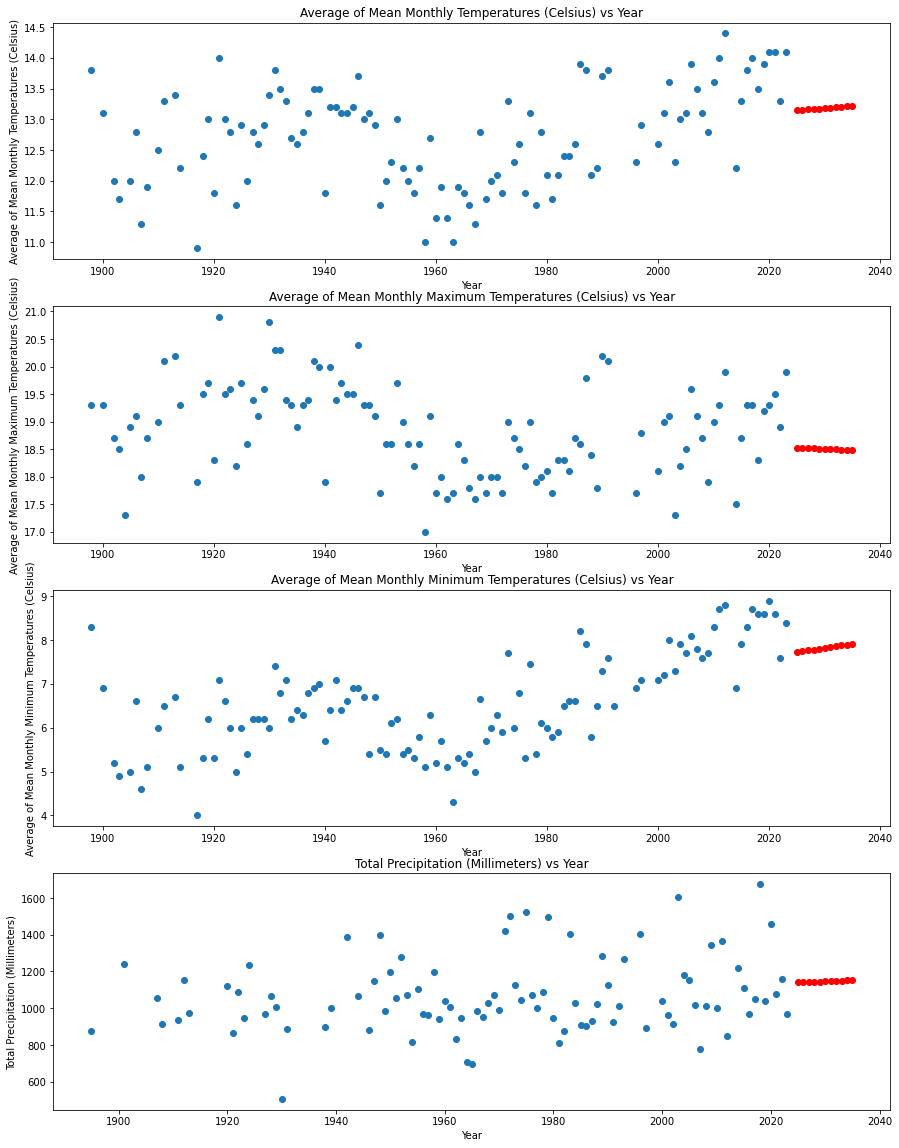

In [41]:
# Define function for predicting future values
def predict_future(model, x):
  intercept, slope = model.params
  return intercept + slope * x

future_X = np.arange(2025,2036)

fig, axs3 = plt.subplots(4, sharex=False, sharey=False)
fig.set_figheight(20)
fig.set_figwidth(15)

# Graph the TAVG temperature per year, which is the average of
# monthly average temperatures of the year
TAVG = col_cd("TAVG")
axs3[0].scatter(TAVG["DATE"], TAVG["TAVG"])
axs3[0].scatter(future_X, predict_future(regTAVG, future_X), color='red')
axs3[0].set_title("Average of Mean Monthly Temperatures (Celsius) vs Year")
axs3[0].set_ylabel("Average of Mean Monthly Temperatures (Celsius)")
axs3[0].set_xlabel("Year")

# Graph the TMAX temperature per year, which is the average of
# mean monthly maximum temperatures of the year
TMAX = col_cd("TMAX")
axs3[1].scatter(TMAX["DATE"], TMAX["TMAX"])
axs3[1].scatter(future_X, predict_future(regTMAX, future_X), color='red')
axs3[1].set_title("Average of Mean Monthly Maximum Temperatures (Celsius) vs Year")
axs3[1].set_ylabel("Average of Mean Monthly Maximum Temperatures (Celsius)")
axs3[1].set_xlabel("Year")

# Graph the TMIN temperature per year, which is the average of
# mean monthly minimum temperatures of the year
TMIN = col_cd("TMIN")
axs3[2].scatter(TMIN["DATE"], TMIN["TMIN"])
axs3[2].scatter(future_X, predict_future(regTMIN, future_X), color='red')
axs3[2].set_title("Average of Mean Monthly Minimum Temperatures (Celsius) vs Year")
axs3[2].set_ylabel("Average of Mean Monthly Minimum Temperatures (Celsius)")
axs3[2].set_xlabel("Year")

# Graph PRCP, the total precipitation per year
PRCP = col_cd("PRCP")
axs3[3].scatter(PRCP["DATE"], PRCP["PRCP"])
axs3[3].scatter(future_X, predict_future(regPRCP, future_X), color='red')
axs3[3].set_title("Total Precipitation (Millimeters) vs Year")
axs3[3].set_ylabel("Total Precipitation (Millimeters)")
axs3[3].set_xlabel("Year")

plt.show()

In [42]:
#Predicted Data
future_TAVG = [predict_future(regTAVG, year) for year in future_X]
for year, temp in zip(future_X, future_TAVG):
    print(f"Year: {year}, Predicted Average Temperature (Celsius): {temp}")
print('')

future_TMAX = [predict_future(regTMAX, year) for year in future_X]
for year, temp in zip(future_X, future_TMAX):
    print(f"Year: {year}, Predicted Average Max Temperature (Celsius): {temp}")
print('')

future_TMIN = [predict_future(regTMIN, year) for year in future_X]
for year, temp in zip(future_X, future_TMIN):
    print(f"Year: {year}, Predicted Average Low Temperature (Celsius): {temp}")
print('')

future_PRCP = [predict_future(regPRCP, year) for year in future_X]
for year, temp in zip(future_X, future_PRCP):
    print(f"Year: {year}, Predicted Average Temperature (Celsius): {temp}")
print('')


Year: 2025, Predicted Average Temperature (Celsius): 13.146763614040893
Year: 2026, Predicted Average Temperature (Celsius): 13.153639759154364
Year: 2027, Predicted Average Temperature (Celsius): 13.160515904267834
Year: 2028, Predicted Average Temperature (Celsius): 13.167392049381306
Year: 2029, Predicted Average Temperature (Celsius): 13.174268194494777
Year: 2030, Predicted Average Temperature (Celsius): 13.181144339608249
Year: 2031, Predicted Average Temperature (Celsius): 13.188020484721719
Year: 2032, Predicted Average Temperature (Celsius): 13.19489662983519
Year: 2033, Predicted Average Temperature (Celsius): 13.201772774948662
Year: 2034, Predicted Average Temperature (Celsius): 13.208648920062133
Year: 2035, Predicted Average Temperature (Celsius): 13.215525065175603

Year: 2025, Predicted Average Max Temperature (Celsius): 18.530356835772217
Year: 2026, Predicted Average Max Temperature (Celsius): 18.525428723371313
Year: 2027, Predicted Average Max Temperature (Celsius):

**Multivariate Linear Regression**

Now we showcase multivariate linear regression to predict temperatures using our climate factors.

Recall that our hypothesis is that climate change factors such as population growth (human activity), deforestation, and greenhouse gas emissions have a significant impact on the trends seen in weather data as time goes on.

Similar to before, we start off with some hypothesis testing to determine if there is a significant relationship between our climate factors and the temperature. Let us start by testing the local impact of factors such as the county population, the amount of deforestation in the county, and total greenhouse gas emissions in Maryland.

**NOTE**: We have manipulated our dataframe here in an attempt to *standardize* it. This is necessary because of the scale of our data is different between variables. For example, greenhouse gas emissions is measured in million metric tons and may be sitting at two digits. On the other hand, population is measured in the hundreds of thousands of people, while tree cover loss is measured in hectacres. Data standardization involves subtracting every value for a certain feature (column) by its mean, and then dividing by its standard deviation. This centers the data at zero and sets the mean to be zero, in effect setting all features to a standard scale. This has the added bonus of later allowing us to compare the standardized coefficients with one another to determine the weight of each metric.

In [43]:
#Perform feature testing for importance on local data
dfClimateFactors.rename(columns={"PG Population":"pg_pop", "PG Tree Cover Lost (HA)":"pg_trees",
                                 "Global Tree Cover Lost (HA)":"global_trees",
                                 "MD Million Metric Tons (CO2)":"MD_gas",
                                 "Global Million Metric Tons (CO2)":"global_gas"}, inplace = True)

#Standardize Data
dfClimateStd = (dfClimateFactors - dfClimateFactors.mean()) / dfClimateFactors.std()
y = dfClimateStd['TAVG']
X = dfClimateStd.drop(columns = ['TAVG', 'global_trees', 'global_gas'])

X = statsmodels.api.add_constant(X)

# Perform OLS regression
formula = "TAVG ~ year + pg_pop + pg_trees + MD_gas"
reg = sm.ols(formula=formula, data=dfClimateStd).fit()
A = np.identity(len(reg.params))
A = A[1:,:]
print(reg.f_test(A))

reg.summary()

<F test: F=1.9884669279550315, p=0.1448797972216305, df_denom=16, df_num=4>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TAVG   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     1.988
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.145
Time:                        07:00:38   Log-Likelihood:                -25.048
No. Observations:                  21   AIC:                             60.10
Df Residuals:                      16   BIC:                             65.32
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.169e-15      0.199  -1.59e-14      1.000      -0.423       0.423
year          -0.3916      0.839     -0.467      0.647      -2.169       1.386
pg_pop         0.0029      0.705      0.004      0.997      -1.492       1.497
pg_trees       0.3020      0.253      1.196      0.249      -0.234       0.838
MD_gas        -1.0547      0.737     -1.432      0.171      -2.616       0.507
==============================================================================
Omnibus:                        3.658   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                1.862
Skew:                          -0.651   Prob(JB):                        0.394
Kurtosis:                       3.658   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What's the deal here? The data appears to be insignificant due to the large Prob(F-statistic) and individual P values.

This is a well known phenomenon in climate science where datasets being used to prove climate change turn out to be insignificant. The American Statistical Association (ASA), Intergovernmental Panel on Climate Change (IPCC), and Change For Science all argue that significance testing should be modified within climate science to either be more lenient or to develop a better method. This is largely because a casual link between climate change factors, such as the ones analyzed here, and global warming has already been proven. However, the fluctuations in temperature due to randomness and the sheer complexity of climate science serve to hide the truth about the casual relationship. Of course, there are also issues with poor dataset resolution, scaling, and the magnitude of effects. For example, in this case, we only have data for the past 30 years, which is not a long time in climate science. Furthermore, we are only analyzing local data.

Read more about statistical significance in climate change data [here](https://senseaboutscienceusa.org/climate-change-statistical-significance-and-science/).
Read more about the IPCC's statement on significance and statistical analyses [here](https://www.amstat.org/asa/files/pdfs/POL-ASAStatementonClimateChange.pdf).

For the sake of the tutorial, we will continue using this dataset in order to demonstrate multivariate linear regression. Note that in pretty much any other dataset, the data should be significant and the F statistic below the commonly accepted critical value and the p value of each explanatory variable also below the critical value. We are just moving forward with analysis with respect to the ASA and IPCC's recommendations mentioned above.

[ 0.         -0.39155888  0.00289732  0.30204208 -1.05465364]


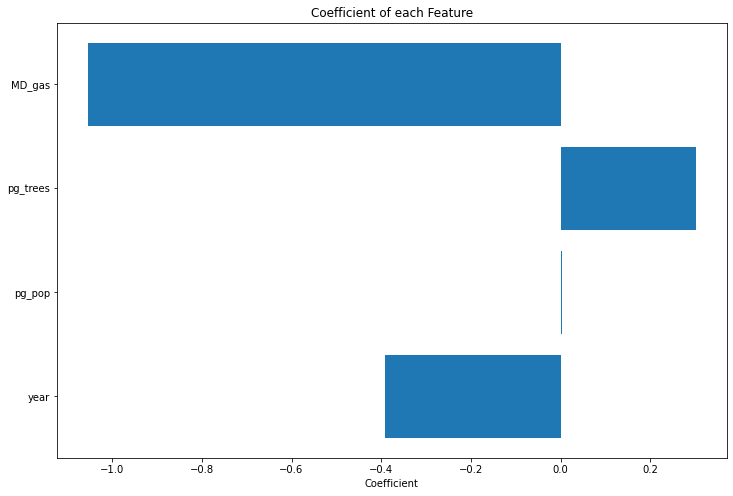

In [44]:
regr = linear_model.LinearRegression().fit(X, y)

plt.figure(figsize=(12, 8))
plt.title('Coefficient of each Feature')
plt.xlabel('Coefficient')
print(regr.coef_)

# create horizontal bar graph with features on the y-axis and the coefficient of each feature as the width
plt.barh(y=dfClimateFactors.columns[[0, 2, 3, 5]], width=regr.coef_[1:5])
plt.show()

From this analysis, we can see that there is a strong negative correlation between Maryland greenhouse gas emissions and the temperature. This is in accordance with our results from the data visualizations where we observed that greenhouse gas emissions in MD were on the decrease while temperatures were on the increase. The large value of the coefficient indicates a higher weight on the model; this conclusion can be made because we have standardized our data and are comparing standardized coefficients ([beta coefficients](https://www.monash.edu/business/marketing/marketing-dictionary/b/beta-coefficient#:~:text=in%20statistical%20analysis%2C%20an%20estimated,influence%20on%20the%20dependent%20variable.)). We also observe a similar negative correlation between the year and the yearly average temperature. This relationship is weaker than the greenhouse gas emissions. We can see that the year may have less of an impact on temperature than expected from the above univariate linear regression and is negative because there are other explanatory variables that better explain the regression. Next, we see a positive correlation between the tree loss and the temperature, showcasing a decently strong positive correlation. Finally, we see that the population has a minimal impact as its coefficient is close to 0.

Again, this is simply an example explanation for our coefficients and is meant to be used as a tutorial. As we noted above, significance testing is simply handled differently in climate data and as a result, these results may only show correlation rather than causation (for example, the total greenhouse gases in the air may be more relevant to temperatures in reality than the amount of emissions per year).

Now let's take a look at global data and how that may affect local temperatures.


In [45]:
#Perform feature testing for importance on global data
y = dfClimateStd['TAVG']
X = dfClimateStd.drop(columns = ['TAVG', 'pg_pop', 'pg_trees', 'MD_gas'])

X = statsmodels.api.add_constant(X)

# Perform OLS regression
formula = "TAVG ~ year + global_trees + global_gas"
reg = sm.ols(formula=formula, data=dfClimateStd).fit()
A = np.identity(len(reg.params))
A = A[1:,:]
print(reg.f_test(A))

reg.summary()

<F test: F=1.7774668884588714, p=0.1895869668107195, df_denom=17, df_num=3>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TAVG   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1.777
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.190
Time:                        07:00:39   Log-Likelihood:                -26.421
No. Observations:                  21   AIC:                             60.84
Df Residuals:                      17   BIC:                             65.02
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.169e-15      0.207  -1.53e-14      1.000      -0.436       0.436
year             0.3003      0.743      0.404      0.691      -1.267       1.868
global_trees     0.2561      0.391      0.654      0.522      -0.570       1.082
global_gas      -0.0502      0.654     -0.077      0.940      -1.430       1.329
==============================================================================
Omnibus:                        5.858   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                3.518
Skew:                          -0.811   Prob(JB):                        0.172
Kurtosis:                       4.178   Cond. No.                         7.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, we see the same issue with significance. Since applying the linear regression model will be the same process, let us demonstrate multivariate regression with significant data.

In [46]:
#Perform feature testing for importance on local data
y = dfClimateStd['TAVG']
X = dfClimateStd.drop(columns = ['TAVG', 'global_gas', 'pg_trees', 'MD_gas', 'global_trees'])

X = statsmodels.api.add_constant(X)

# Perform OLS regression
formula = "TAVG ~ year + pg_pop"
reg = sm.ols(formula=formula, data=dfClimateStd).fit()
A = np.identity(len(reg.params))
A = A[1:,:]
print(reg.f_test(A))

reg.summary()

<F test: F=2.627119127220233, p=0.09975472735142939, df_denom=18, df_num=2>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TAVG   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     2.627
Date:                Fri, 17 May 2024   Prob (F-statistic):             0.0998
Time:                        07:00:39   Log-Likelihood:                -26.596
No. Observations:                  21   AIC:                             59.19
Df Residuals:                      18   BIC:                             62.33
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.176e-15      0.202  -1.57e-14      1.000      -0.425       0.425
year           0.2059      0.690      0.298      0.769      -1.244       1.656
pg_pop         0.2749      0.690      0.398      0.695      -1.175       1.725
==============================================================================
Omnibus:                        5.874   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                3.530
Skew:                          -0.830   Prob(JB):                        0.171
Kurtosis:                       4.130   Cond. No.                         6.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, we are just barely on the cusp of significance with alpha set to 0.1, as recommended by some climate scientists, as our Prob (F-statistic) is 0.0998. Additionally, applying an F test shows that our F value is in fact just barely larger than our F critical value.

Inflating the P-value from 0.05 to 0.1 in such a way is usually frowned upon, as it can increase the probability of attaining a type I error. However, with prior studies proving a causality between climate change features and increasing average temperatures, there is a foundation to do so.

[0.         0.20590703 0.27490574]


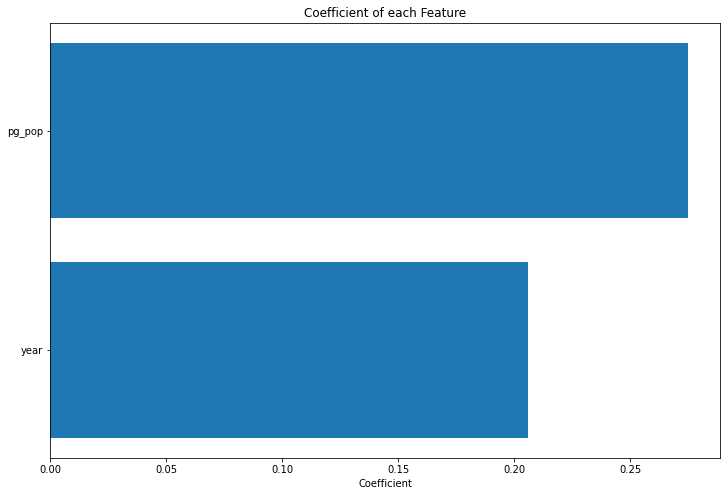

In [47]:
regr = linear_model.LinearRegression().fit(X, y)

plt.figure(figsize=(12, 8))
plt.title('Coefficient of each Feature')
plt.xlabel('Coefficient')
print(regr.coef_)

# create horizontal bar graph with features on the y-axis and the coefficient of each feature as the width
plt.barh(y=dfClimateFactors.columns[[0, 2]], width=regr.coef_[1:3])
plt.show()

Additionally, since our data is standardized, these coefficients are the standardized coefficients and can thus be directly compared.

AN explanation of the results. See my interpretation of results for the above bar graph as an example.

# Insights and Conclusions
In the final stage of the data science pipeline, we consider any and all insights we can gleam from our data analysis. Data science has the possibility of shaping future policy so it is important to inform stakeholders and policymakers.

In the case of our tutorial, we aim to reveal long term climate trends and develop predictive models for future weather conditions, namely temperature increases and inclement weather. As stated in our introduction, our stakeholders and policymakers will be University and local government officials who can utilize our data to help guide their future plans for development/infrastructure and inclement weather guidelines to help improve the College Park community. However, reseasrchers and citizens invested in Maryland climate patterns and meteorological explorations may also find this work useful.

From our dataset, we can make the following conclusions:

The mean monthly temperature is increasing with time.

While overall temperatures are increasing, College Park is experiencing an overall decrease in extreme temperatures with the monthly mean lows increasing and the monthly mean highs decreasing. This indicates a convergence in temperature.

Finally, we can conclude an increase in more inclement weather, symbolized by the increase in precipitation as time goes on.

**Impact in the Real World**

The result of our conclusions can have a significant impact on policymakers. We have demonstrated that global climate trends, impacted by climate change, have a drastic local impact on College Park, and thus by extension, the University of Maryland. Local and University officials must take these trends into account. Increasing temperatures suggests the need to update policy regarding heat exhasution, the availability of air conditioning and hydration stations, and infrastructure built with cooling in mind. The narrowing of extreme temperatures suggests a lack of a difference between the four seasons, which can have large impacts on the surrounding ecosystem that is dependent on seasonal fluctuations. The City of College Park must take this into consideration when renovating public areas that interact with the ecosystem, such as the Paint Branch Trail and Lake Artemisia. The increasing precipitation suggests more inclement weather which leads to massive considerations in road and building infrastructure to minimize runoff pollution and the need to renovate roads to better adapt to rainy environments.

Additionally, increasing temperatures and a suggestion that climate change is indeed having a measurable effect on the College Park community prompts further discussion into what tangible effects of climate change outside of temperature and precipitation are going to take hold in the foreseeable future. Extreme weather events, fires, and other effects of global climate change should be evaluated for their risk of occuring locally, and from these future studies, policy decisions can be made to mitigate potential damage.

The data presented here may be significant to the Prince George's county government, which compiles a climate action plan to detail the impacts of climate change in the county and also the efforts to counter it. This is a real life example of a body that would benefit from this analysis. In turn, their results will impact the daily lives of their citizens, including students at the University of Maryland. Read more about their action plan [here](https://www.princegeorgescountymd.gov/departments-offices/environment/sustainability/climate-change).

Read more about how weather patterns and climate change may impact the day to day human lifestyle and affect policy [here](https://science.nasa.gov/climate-change/adaptation-mitigation/).
Read more about the entire data science lifecycle [here](https://hdsr.mitpress.mit.edu/pub/577rq08d/release/4)

